In [1]:
import requests
import pendulum

import pandas as pd # don't forget to install openpyxl also as pandas is going to use it internally.
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go

from celluloid import Camera
from matplotlib.animation import FuncAnimation, PillowWriter
from tqdm import tqdm

%matplotlib inline

## Life expectancy

In [2]:
url = "https://docs.google.com/spreadsheets/d/1RehxZjXd7_rG8v2pJYV6aY0J3LAsgUPDQnbY4dRdiSs/export?format=xlsx"

In [3]:
response = requests.get(url)
with open('/tmp/temp_life_expectancy.xlsx', 'wb') as f:
    f.write(response.content)

In [4]:
xls = pd.ExcelFile('/tmp/temp_life_expectancy.xlsx')

In [5]:
dfs = {sheet_name: pd.read_excel(xls, sheet_name) for sheet_name in xls.sheet_names}

In [6]:
dfs.keys()

dict_keys(['ABOUT', 'data-for-world-by-year', 'data-for-regions-by-year', 'data-for-countries-etc-by-year', 'data-notes-and-uncertainty', 'unpivot', 'live unpivot', 'data-lex-in-columns'])

## GDP

In [7]:
url = "https://docs.google.com/spreadsheets/d/1i5AEui3WZNZqh7MQ4AKkJuCz4rRxGR_pw_9gtbcBOqQ/export?format=xlsx"

In [8]:
response = requests.get(url)
with open('/tmp/temp_gdp.xlsx', 'wb') as f:
    f.write(response.content)

In [9]:
gdp_xls = pd.ExcelFile('/tmp/temp_gdp.xlsx')
gdp_dfs = {sheet_name: pd.read_excel(gdp_xls, sheet_name) for sheet_name in gdp_xls.sheet_names}
gdp_dfs.keys()

dict_keys(['ABOUT', 'data-for-world-by-year', 'data-for-regions-by-year', 'data-for-countries-etc-by-year', 'unpivot-GDP-per-capita', 'aggregates', 'input_pop_normalised', 'group_mapping', 'INPUT_gdp_pcap', 'INPUT_gdp', 'INPUT_gdp_growth', '1990 onwards'])

### data-for-world-by-year VS GDP

In [10]:
data_for_world_by_year_le_df = dfs['data-for-world-by-year']
print(data_for_world_by_year_le_df.shape)
data_for_world_by_year_le_df.head(10)

(301, 4)


,geo,name,time,Life expectancy
0,world,World,1800,30.641734
1,world,World,1801,30.712394
2,world,World,1802,30.600519
3,world,World,1803,30.277589
4,world,World,1804,30.197492
5,world,World,1805,30.780823
6,world,World,1806,30.790822
7,world,World,1807,30.739852
8,world,World,1808,30.709765
9,world,World,1809,30.732406


In [11]:
data_for_world_by_year_le_df.rename(columns={'Life expectancy ': 'life_expectancy',
                                          'time': 'year',
                                          'name': 'area'},
                                 inplace=True)
data_for_world_by_year_le_df.sample(10)

,geo,area,year,life_expectancy
175,world,World,1975,61.759792
114,world,World,1914,36.948750
295,world,World,2095,83.058871
31,world,World,1831,31.155215
15,world,World,1815,30.938362
2,world,World,1802,30.600519
182,world,World,1982,64.177582
16,world,World,1816,31.047932
271,world,World,2071,80.392444
195,world,World,1995,67.150713


In [12]:
data_for_world_by_year_le_df['life_expectancy'].max(), data_for_world_by_year_le_df['life_expectancy'].min()

(np.float64(83.61751128784078), np.float64(24.544647531771062))

In [13]:
data_for_world_by_year_gdp_df = gdp_dfs['data-for-world-by-year']
print(data_for_world_by_year_gdp_df.shape)
data_for_world_by_year_gdp_df.head(10)

(301, 6)


,geo,name,time,Income per person,GDP total,GDP per capita growth (%)
0,world,World,1800,1521.149042,1495463949050,NaN
1,world,World,1801,1519.369104,1498924942626,-0.12
2,world,World,1802,1520.921848,1505735026471,0.10
3,world,World,1803,1518.414540,1508584702240,-0.16
4,world,World,1804,1518.972352,1514535783170,0.04
5,world,World,1805,1516.843393,1517865798406,-0.14
6,world,World,1806,1516.090824,1522626781422,-0.05
7,world,World,1807,1516.346683,1528463407096,0.02
8,world,World,1808,1509.014395,1526690245305,-0.48
9,world,World,1809,1509.382626,1532747659639,0.02


In [14]:
data_for_world_by_year_gdp_df.rename(columns={'Income per person': 'income_per_person($)',
                                              'time': 'year',
                                              'GDP total': 'gdp_total($)',
                                              'name': 'area'},
                                     inplace=True)
data_for_world_by_year_gdp_df.sample(10)

,geo,area,year,income_per_person($),gdp_total($),GDP per capita growth (%)
61,world,World,1861,1880.960085,2447665556320,-0.49
163,world,World,1963,6256.594314,19932363101032,2.54
180,world,World,1980,9264.602055,41034417623110,0.25
46,world,World,1846,1677.271620,2106533280740,0.03
249,world,World,2049,25172.469290,242336532945475,1.08
57,world,World,1857,1837.739927,2372234174016,1.29
179,world,World,1979,9241.501446,40212188906106,1.72
67,world,World,1867,1979.480932,2622783821021,0.43
137,world,World,1937,4215.063993,9351342956078,3.88
295,world,World,2095,39522.874840,409079054189787,0.92


#### merging world's life-expectancy with world's gdp data

In [15]:
data_for_world_by_year_df = pd.merge(left = data_for_world_by_year_le_df,
                                  right = data_for_world_by_year_gdp_df, 
                                  how = 'inner', on = ['geo', 'area', 'year'])
data_for_world_by_year_df.shape, data_for_world_by_year_df.drop_duplicates().shape

((301, 7), (301, 7))

In [16]:
data_for_world_by_year_df

,geo,area,year,life_expectancy,income_per_person($),gdp_total($),GDP per capita growth (%)
0,world,World,1800,30.641734,1521.149042,1495463949050,NaN
1,world,World,1801,30.712394,1519.369104,1498924942626,-0.12
2,world,World,1802,30.600519,1520.921848,1505735026471,0.10
3,world,World,1803,30.277589,1518.414540,1508584702240,-0.16
4,world,World,1804,30.197492,1518.972352,1514535783170,0.04
...,...,...,...,...,...,...,...
296,world,World,2096,83.170480,39883.457770,412499808827215,0.91
297,world,World,2097,83.280416,40245.833070,415899839846212,0.91
298,world,World,2098,83.393080,40609.854570,419277717430533,0.90
299,world,World,2099,83.506378,40975.392090,422634535425122,0.90


In [17]:
years = sorted(data_for_world_by_year_df['year'].unique())

In [18]:
current_year = pendulum.now().add(years=-1).year
current_year

2023

100%|███████████████████████████████████████████████████████████████████████████| 301/301 [00:00<00:00, 380.44it/s]
MovieWriter imagemagick unavailable; using Pillow instead.


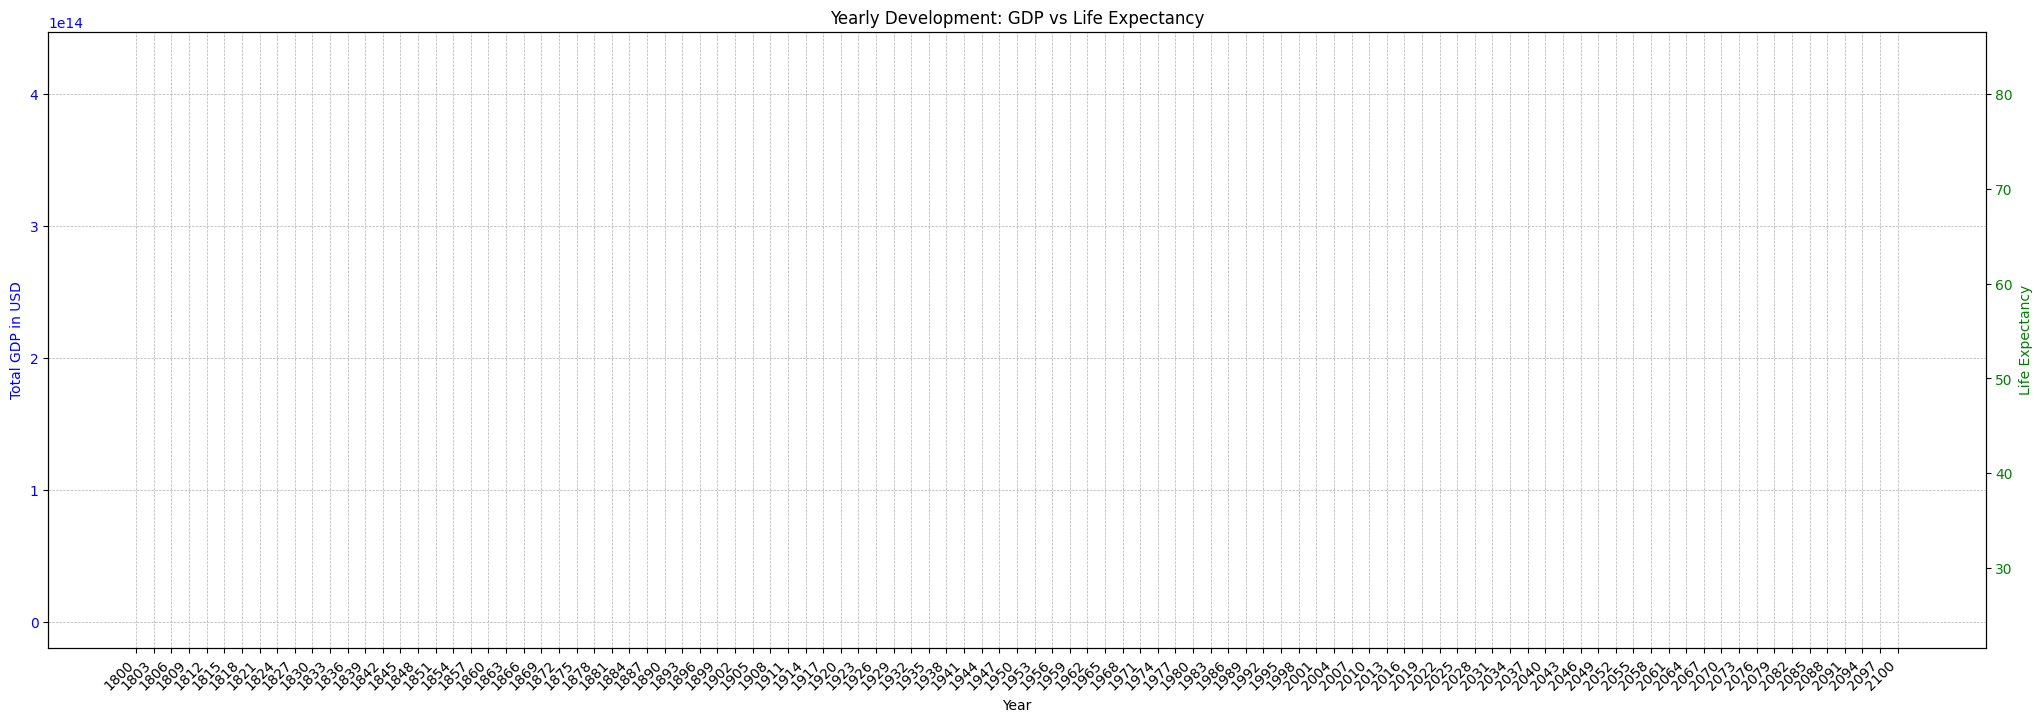

In [19]:
fig, ax1 = plt.subplots(figsize=(25, 8))
camera = Camera(fig)

ax2 = ax1.twinx()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

gdp_x, gdp_y, le_x, le_y = [], [], [], []

# Add a vertical line for the current year on every frame
ax1.axvline(x=current_year, color='red', linestyle='-', linewidth=2, label='Projection Start')

# To show one out of every three years
years_to_display = years[::3]

for year in tqdm(years):
    subset = data_for_world_by_year_df[data_for_world_by_year_df['year'] == year]
    gdp_x.append(year)
    gdp_y.append(subset['gdp_total($)'].values[0])
    le_x.append(year)
    le_y.append(subset['life_expectancy'].values[0])

    ax1.plot(gdp_x, gdp_y, color='blue', label='GDP (USD)' if year == years[0] else "", linestyle='-' if year <= current_year else '--', marker='o')
    ax2.plot(le_x, le_y, color='green', label='Life Expectancy (years)' if year == years[0] else "", linestyle='-' if year <= current_year else '--', marker='o')

    ax1.axvline(x=current_year, color='red', linestyle='-', linewidth=2)
    
    # Set x-ticks to the years to display and rotate them to fit nicely
    if year in years_to_display:
        ax1.set_xticks(years_to_display)
        ax1.set_xticklabels(years_to_display, rotation=45, ha="right")

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total GDP in USD', color='blue')
    ax2.set_ylabel('Life Expectancy', color='green')

    # Formatting for each frame
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.title('Yearly Development: GDP vs Life Expectancy')

    if year == years[0]:
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

    camera.snap()

animation = camera.animate()
animation.save('gm_le_gdp_improved_faster_with_line.gif', writer='imagemagick', fps=12)


--------

In [20]:
# Create traces for actual and projected years
trace1_actual = go.Scatter(
    x=data_for_world_by_year_df_sample[data_for_world_by_year_df_sample['year'] <= current_year]['year'],
    y=data_for_world_by_year_df_sample[data_for_world_by_year_df_sample['year'] <= current_year]['gdp_total($)'],
    mode='lines+markers',
    name='GDP (Actual)',
    line=dict(color='blue')
)

trace1_projected = go.Scatter(
    x=data_for_world_by_year_df_sample[data_for_world_by_year_df_sample['year'] > current_year]['year'],
    y=data_for_world_by_year_df_sample[data_for_world_by_year_df_sample['year'] > current_year]['gdp_total($)'],
    mode='lines+markers',
    name='GDP (Projected)',
    line=dict(color='blue', dash='dash')
)

trace2_actual = go.Scatter(
    x=data_for_world_by_year_df_sample[data_for_world_by_year_df_sample['year'] <= current_year]['year'],
    y=data_for_world_by_year_df_sample[data_for_world_by_year_df_sample['year'] <= current_year]['life_expectancy'],
    mode='lines+markers',
    name='Life Expectancy (Actual)',
    line=dict(color='green')
)

trace2_projected = go.Scatter(
    x=data_for_world_by_year_df_sample[data_for_world_by_year_df_sample['year'] > current_year]['year'],
    y=data_for_world_by_year_df_sample[data_for_world_by_year_df_sample['year'] > current_year]['life_expectancy'],
    mode='lines+markers',
    name='Life Expectancy (Projected)',
    line=dict(color='green', dash='dash')
)

fig = go.Figure(data=[trace1_actual, trace1_projected, trace2_actual, trace2_projected])
fig.update_layout(
    title='Yearly Development: GDP vs Life Expectancy',
    xaxis_title='Year',
    yaxis_title='Values',
    legend_title='Data Type'
)

fig.show()

NameError: name 'data_for_world_by_year_df_sample' is not defined

-----

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
data_for_world_by_year_df = dfs['data-for-world-by-year']
current_year = 2023  # Define the last actual data year

# Set up the figure
plt.figure(figsize=(15, 8))

# Plotting with Seaborn
sns.lineplot(data=data_for_world_by_year_df_sample, x='year', y='gdp_total($)', estimator=None, color='blue', label='Total GDP in USD')
sns.lineplot(data=data_for_world_by_year_df_sample, x='year', y='life_expectancy', estimator=None, color='green', label='Life Expectancy')

# Mark projected years with a dotted line
for line in plt.gca().get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    projected_mask = x_data > current_year
    plt.plot(x_data[projected_mask], y_data[projected_mask], linestyle='--', color=line.get_color())

plt.title('Yearly Development: GDP vs Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.show()
